<a href="https://colab.research.google.com/github/AimoneCG/Proyecto-Coderhouse-Data-Science-II-Machine-Learning-para-la-Ciencia-de-Datos/blob/main/Proyecto_DSII_Aimone_Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega Final** -  Cristian Aimone
# Data Science II : Data Science II: Machine Learning para la Ciencia de Datos
# Comisión 61680
### Fecha: 05/04/2025


# **Abstracto con Motivación y audiencia**
- El dataset elegido contiene una vision global del mercado de propiedades de Nueva York
- Incluye datos como el precio de las propiedades, su ubicacion y caracteristicas principales; tales como superfice, cantidad de dormitorios y cantidad de baños que pueden utilizarse para analizar posibles factores predictivos de la valuacion de distintas propiedades en el estado de Nueva York (USA) y clasificación de los distintos tipod de propiedades de acuerdo a su rango de precio y ubicación.
- Los datos incluidos como Longitud y Latitud de la ubicación de las propiedades son fundamentales para generar visualizaciones atractivas y simples para entender la distribución geografica de los distintos tipos de propiedades.

# Motivacion:
- Dado que el mercado inmobiliario es uno de los mercados con mayor movimiento
y que tiene grandes margenes de ganancia debido a la imprtancia de los valores de lso productos inmobiliarios, tiene un gran numero de posibles usuarios de este tipo de análisis estadístico para la ayuda de toma de desiciones.
- Se tratará de generar una análisis estadistico que ayude a determinar el posible precio de propiedades para tener una correcta herramienta de tasación de acuerdo a comparables y un gran número de datos.

# Audiencia:
- Este analisis puede contar con distintos interesados entre los que se encuentran:
   - Vendedores o agentes inmobiliarios
  - Compradores
  - Inversores de mercado inmobiliario
  - Analistas del mercado inmobiliario
  - Entidades financieras qeu dan prestamos hipotecarios
- la audiencia principal de este estudio son los vendedores o agentes inmobiliarios, ya qyue se trata de lograr una herramienta de análisis que pueda predecir el precio y segmentación de las propiedades para dirigir campañas de captación de propiedades y el marketing adecuado. Tambien se espera poder realizar las tasaciones de una manera mas profesional.

# Contexto Comercial y Análitico

- ## Contexto Comercial:
 - Para mejorar la eficiencia del mercado inmobiliario un modelo de prediccion de precios y valuación será muy beneficioso. La principal aplicación comercial de las predicciones de precios genera un valor agregado tanto a compradores como a vendedores y agentes inmobiliarios, como asi tambien a todos los demas actores interesados en dicha información. Es un mercado con una adudiencia diversa.
 -
 - La segmentación correcta de las propiedades puede ayudar a identificar distintas agrupaciones entre las popiedades en el mercado que beneficiran a los actores en sus campañas de marketing, analisis de inversión y captaciones de propiedades.

- ## Contexto Analítico:
  - En este modelo las variables predictivas incluirán tanto las caracteristicas físicas de las propiedades (como ser: superficie, número de habitaciones, baños, etc.), como información de su ubucación y el análisis de su cercanía con puntos de interes o distintas zonas.
  - Si se pudiera contar con indormación geográfica externa de puntos de interés mejoraría la presición del modelo.
  - Se realizará la limpieza y trnasformación de datos para normalizar y estandarizar las variables que lo requieran. Se codificaran las variables categóricas que sean críticas para el análisis y se dejaran de lado las variablesque no tengan una incidencia significativa en el modelo.
  - Se visualizaran los datos para identificar patrones, distribuciones y outliers. Se usarán gáficos como scatter plots, histogramas y mapas.
  - Para el analisis predictivo se usaran metódos estadísticos y de Machine Learning como regresión líneal y Random Forest.
  - Para medir el rendimiento de los distintos modelos de predicción de los precios de las propiedades se utilizaran las metricas como el MSE (Error Cuadratico Medio), el R2 (R Cuadrado), o el MAE (Error Absoluto Medio)
  - Si se realiza un análisis de clustering se enplearan algoritmos como K-means.

# **Hipótesis / Preguntas a resolver**

Dentro del negocio de los bienes raices en el estado de Neva York, la distinta audiencia está interesada en responder las siguientes preguntas:
 - ¿Que caracteristicas son mas predictivas para determinar el posible precio de las propiedades?
 - ¿Se puede predecir el precio de las propiedades para ser mas eficiente en el negocio inmobiliario?
 - ¿Se pueden agrupar las propiedades para segmentar mejor las ofertas de venta?

Con la información aportada por el dataset se puede sostener la hipótesis de
que el precio de las propiedades está mas correlacionado con la ubicación de
las propiedades que con las caracteristicas físicas de la misma como
superficie o cantidad de habitaciones. Además se puede sumar a la hipotesis que para encontrar oportunidades de inversión se debe identificar los outliers inferiores dentro de cada segmento.


# **Objetivos**

- Analizar desde el punto de vista de los agentes inmobiliarios los factores que determinan el precio de una propiedad.
- Poder determinar y predecir el precio de los inmuebles con similares caracteristicas.
- Poder determinar a que segmento de propiedades pertenece cada una de las que se encuentra en el dataset, para poder ofrecerla a comprador apropiado.

# **Lectura de datos**

## Importación de librerias

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


## Lectura del daaset

- Configuramos el notebook para leer el dataset desde Github

In [124]:
url = "https://raw.githubusercontent.com/AimoneCG/Proyecto-Coderhouse-Data-Science-II-Machine-Learning-para-la-Ciencia-de-Datos/main/NY-House-Dataset.csv"

df = pd.read_csv(url)

## Análisis Inicial del dataset

In [125]:
df.shape

(4801, 17)

In [126]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


 - Se puede apreciar que el dataset contiene 4801 filas y 17 columnas.
 - Algunos de los datos parecen incorrectos, como el
 ADMINISTRATIVE_AREA_LEVEL_2, donde figura el pais en vez del estado. LOCALITY parece ser un valor único. De confiormarse se puede prescindir de esa variable.
 - PROPERTYSQRF se encuentra en Pies cuadrados y se podría convertir a metros cuadrados para una mejor comprensión local

In [127]:
df.info(  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

- El dataset no contiene valores nulos
- El campo Type es del tipo object, pero convendría convertirlo a int64 para poder usarlo mejor en el análisis

## Diccionario de variables


- BROKERTITLE: Título del broker
- TYPE: Tipo de vivienda
- PRICE:  Precio de la vivienda
- BEDS:Número de dormitorios
- BATH: Número de baños
- PROPERTYSQFT: Pies cuadrados de la vivienda (se pasará a metros cuadrados para una mejor interpretación local)
- ADDRESS: Dirección completa de la casa
- STATE: Estado (Provincia) de la casa
- MAIN_ADDRESS: Información de la dirección principal
- ADMINISTRATIVE_AREA_LEVEL_2: Información sobre el nivel 2 del área administrativa. Usualmente es la provincia o estado. (Nivel 1 es Pais, Nivel 2 es provincia, Nivel 3 es Ciudad o Localidad, Nivel 4 es el barrio)
- LOCALITY: Información sobre la localidad
- SUBLOCALITY: Información de la sublocalidad
- STREET_NAME: Nombre de la calle
- LONG_NAME: Nombre largo
- FORMATTED_ADDRESS: Dirección formateada
- LATITUDE: Coordenada de latitud de la casa
- LONGITUDE:  Coordenada de longitud de la casa


- Mediante el metodo describe se puede hacer un análisis preliminar estadístico de las variables numéricas del dataframe.

In [128]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


De este analisis podemos ver que:
- Hay una propiedad con 50 habitaciones que seguramente es un outlier que está afectando todas estas variables analizadas
- Considerando todo el dataset el precio promedio de las proiedades es de 2.35 Millones de USD
- La vivienda promerio tiene 3 Habitaciones y 2 baños.

# **Data Wranglimg - Limpieza y transformación de datos**



## Valores duplicados

In [129]:
# Se busca si hay propiedades duplicadas por su dirección Principal
duplicate_addresses = df[df.duplicated(subset=['MAIN_ADDRESS'], keep=False)]
duplicate_addresses

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
29,Brokered by Ashford Homes,Multi-family home for sale,1299888,10,6.000000,3156.000000,310-312 Hillside Ave,"Staten Island, NY 10304","310-312 Hillside AveStaten Island, NY 10304",New York,Richmond County,Staten Island,Clifton,310,"310 Hillside Ave #312, Staten Island, NY 10304...",40.615567,-74.086955
36,Brokered by Ashford Homes,Multi-family home for sale,1299888,11,4.000000,3156.000000,310-312 Hillside Ave,"Staten Island, NY 10304","310-312 Hillside AveStaten Island, NY 10304",New York,Richmond County,Staten Island,Clifton,310,"310 Hillside Ave #312, Staten Island, NY 10304...",40.615567,-74.086955
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
113,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


In [130]:
# Se eliminan los 218 registros duplicados ya que con los datos que se ven a simple vista se puede apreciar que tienen hasta el mismo precio. Se procede a limpiar el conjunto de datos principal (no creamos un nuevo df)

df.drop_duplicates(subset=['MAIN_ADDRESS'], inplace=True) #Sacamos solo las filas donde "MAIN_ADDRESS" está duplicado

In [131]:
# Se confirmaa el que el nuevo tamaño del dataframe sea menor a 4801
df.shape

(4583, 17)

# Valores Nulos

In [132]:
# Contar los valores nulos por columna
df.isnull().sum().sum()

np.int64(0)

- Se confirma que no hay nulos en el dataset

## Tratamiento de Valores Outliers

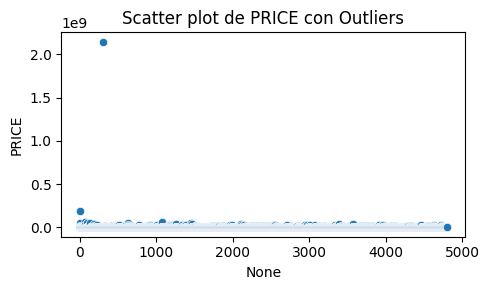

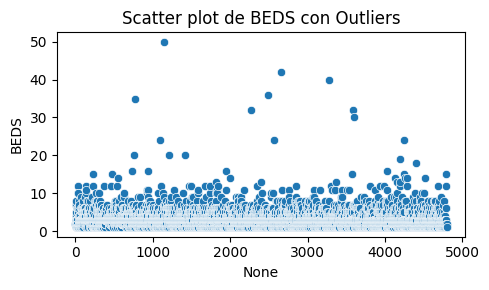

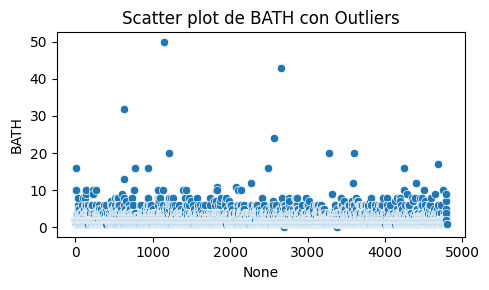

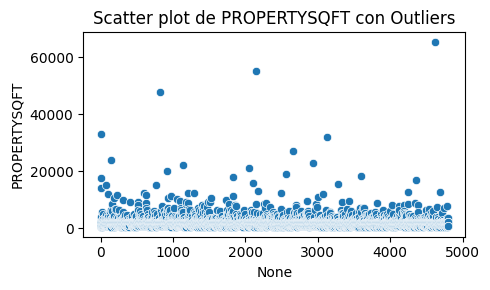

In [133]:
#Se identifican los outliers en las columnas numéricas con IQR

numerical_features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


# Se grafican usando Scatter plot
    plt.figure(figsize=(5,3))
    sns.scatterplot(data=df, x=df.index, y=col)
    plt.title(f'Scatter plot de {col} con Outliers')

    plt.tight_layout()  # Ajusta los parametros para mostrarlos mas ajustados
    plt.show()



In [134]:
# se crea un nuevo df sin outliers
df_sin_outliers = df.copy()

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_sin_outliers =  df_sin_outliers[(df_sin_outliers[col] >= lower_bound) & (df_sin_outliers[col] <= upper_bound)]

# Se verifica como queda el nuevo df

df_sin_outliers.shape

(3803, 17)

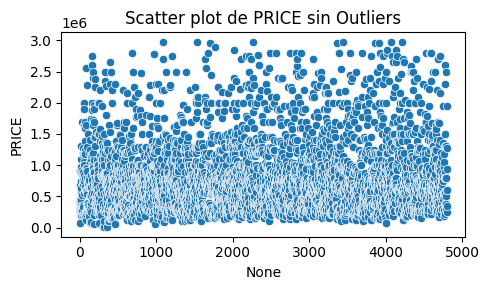

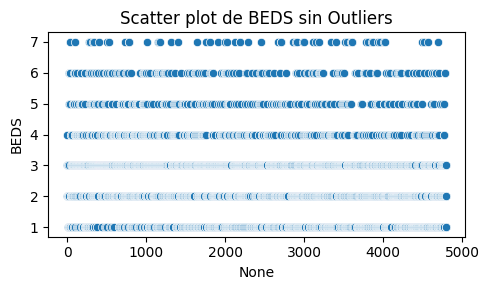

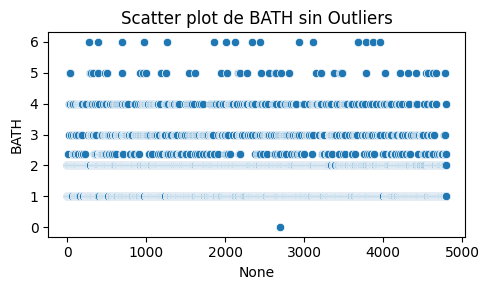

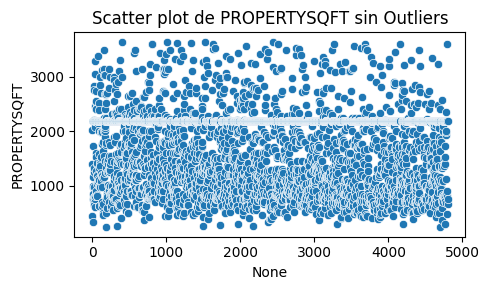

In [135]:
# Se grafican usando Scatter plot en nuevo dataset sin outliers
for col in numerical_features:
    plt.figure(figsize=(5,3))
    sns.scatterplot(data=df_sin_outliers, x=df_sin_outliers.index, y=col)
    plt.title(f'Scatter plot de {col} sin Outliers')

    plt.tight_layout()  # Ajusta los parametros para mostrarlos mas ajustados
    plt.show()


## Otras Transformaciones y normalización de Variables

In [136]:
# Imprimo el nombre de las columnas para trabajarlas
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [137]:
# Creo un diccionario con los valores únicos de la columna 'TYPE' que representa el tipo de propiedad en el mercado
unique_types = df['TYPE'].unique()
type_dict = dict(enumerate(unique_types))

# Muestro el diccionario en pantalla
type_dict

{0: 'Condo for sale',
 1: 'House for sale',
 2: 'Townhouse for sale',
 3: 'Co-op for sale',
 4: 'Multi-family home for sale',
 5: 'For sale',
 6: 'Contingent',
 7: 'Land for sale',
 8: 'Foreclosure',
 9: 'Pending',
 10: 'Coming Soon',
 11: 'Mobile house for sale',
 12: 'Condop for sale'}

In [138]:
# Codifico la variable objetivo 'TYPE' Usando LabelEncoder y Creo una nueva columna en el df_sin_outliers con los valores codificados
label_encoder = LabelEncoder()
df_sin_outliers['TYPE_NUMBER'] = label_encoder.fit_transform(df_sin_outliers['TYPE'])

# Verifico
print(df_sin_outliers['TYPE'].value_counts())
print(label_encoder.classes_)

#Imprimo la cabecera para verificar el cambio realizado
print(df_sin_outliers[['TYPE', 'TYPE_NUMBER']].head())


TYPE
Co-op for sale                1286
House for sale                 860
Condo for sale                 689
Multi-family home for sale     486
Pending                        207
Townhouse for sale             120
Contingent                      81
Land for sale                   42
For sale                        13
Foreclosure                     12
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64
['Co-op for sale' 'Coming Soon' 'Condo for sale' 'Condop for sale'
 'Contingent' 'For sale' 'Foreclosure' 'House for sale' 'Land for sale'
 'Mobile house for sale' 'Multi-family home for sale' 'Pending'
 'Townhouse for sale']
             TYPE  TYPE_NUMBER
0  Condo for sale            2
2  House for sale            7
3  Condo for sale            2
6  Condo for sale            2
8  Co-op for sale            0


In [139]:
# Imprimo la cabecera para verificar los cambios
df_sin_outliers.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,TYPE_NUMBER
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,7
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,2
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,0


In [140]:
# Creo un diccionario con los valores únicos de la columna 'SUBLOCALITY'
unique_types = df['SUBLOCALITY'].unique()
type_dict = dict(enumerate(unique_types))

#Imprimo el diccionario
type_dict

{0: 'Manhattan',
 1: 'New York County',
 2: 'Richmond County',
 3: 'Kings County',
 4: 'New York',
 5: 'East Bronx',
 6: 'Brooklyn',
 7: 'The Bronx',
 8: 'Queens',
 9: 'Staten Island',
 10: 'Queens County',
 11: 'Bronx County',
 12: 'Coney Island',
 13: 'Brooklyn Heights',
 14: 'Jackson Heights',
 15: 'Riverdale',
 16: 'Rego Park',
 17: 'Fort Hamilton',
 18: 'Flushing',
 19: 'Dumbo',
 20: 'Snyder Avenue'}

In [141]:
# Vuelvo a crear un diccionario con los valores únicos de 'SUBLOCALITY' del dataset df_sin_outliers
unique_SUBLOCALITY = df_sin_outliers['SUBLOCALITY'].unique()
SUBLOCALITY_dict = dict(enumerate(unique_SUBLOCALITY))

# Mediante esta funcion cambio los valores de los nombres por los valores numéricos asignado en el diccionario. no uso label encoder como con TYPE porque me cambio el ordén y no me gustó mucho como quedaba.
reversed_SUBLOCALITY_dict = {v: k for k, v in SUBLOCALITY_dict.items()}

# Creo la nueva columna 'SUBLOCALITY_NUMBER' usando el diccionado de la función anterior
df_sin_outliers['SUBLOCALITY_NUMBER'] = df_sin_outliers['SUBLOCALITY'].map(reversed_SUBLOCALITY_dict)

# Imprimo para verificar los cambios
print(df_sin_outliers[['SUBLOCALITY', 'SUBLOCALITY_NUMBER']])


          SUBLOCALITY  SUBLOCALITY_NUMBER
0           Manhattan                   0
2     Richmond County                   1
3     New York County                   2
6            New York                   3
8          East Bronx                   4
...               ...                 ...
4796         New York                   3
4797    Queens County                   9
4798  New York County                   2
4799           Queens                   7
4800         Brooklyn                   5

[3803 rows x 2 columns]


In [142]:
# Confirmo el cambio con el comando shape para verificar la creacion de las variables númericas del tupo de vivienda y la ubicación entre el dataset original y el nuevo sin outliers
df.shape


(4583, 17)

In [143]:
df_sin_outliers.shape

(3803, 19)

## **EDA - Análisis Exploratorio de Datos**

El primer análisis exploratorio que hago es graficar la distribución de todas las variables númericas

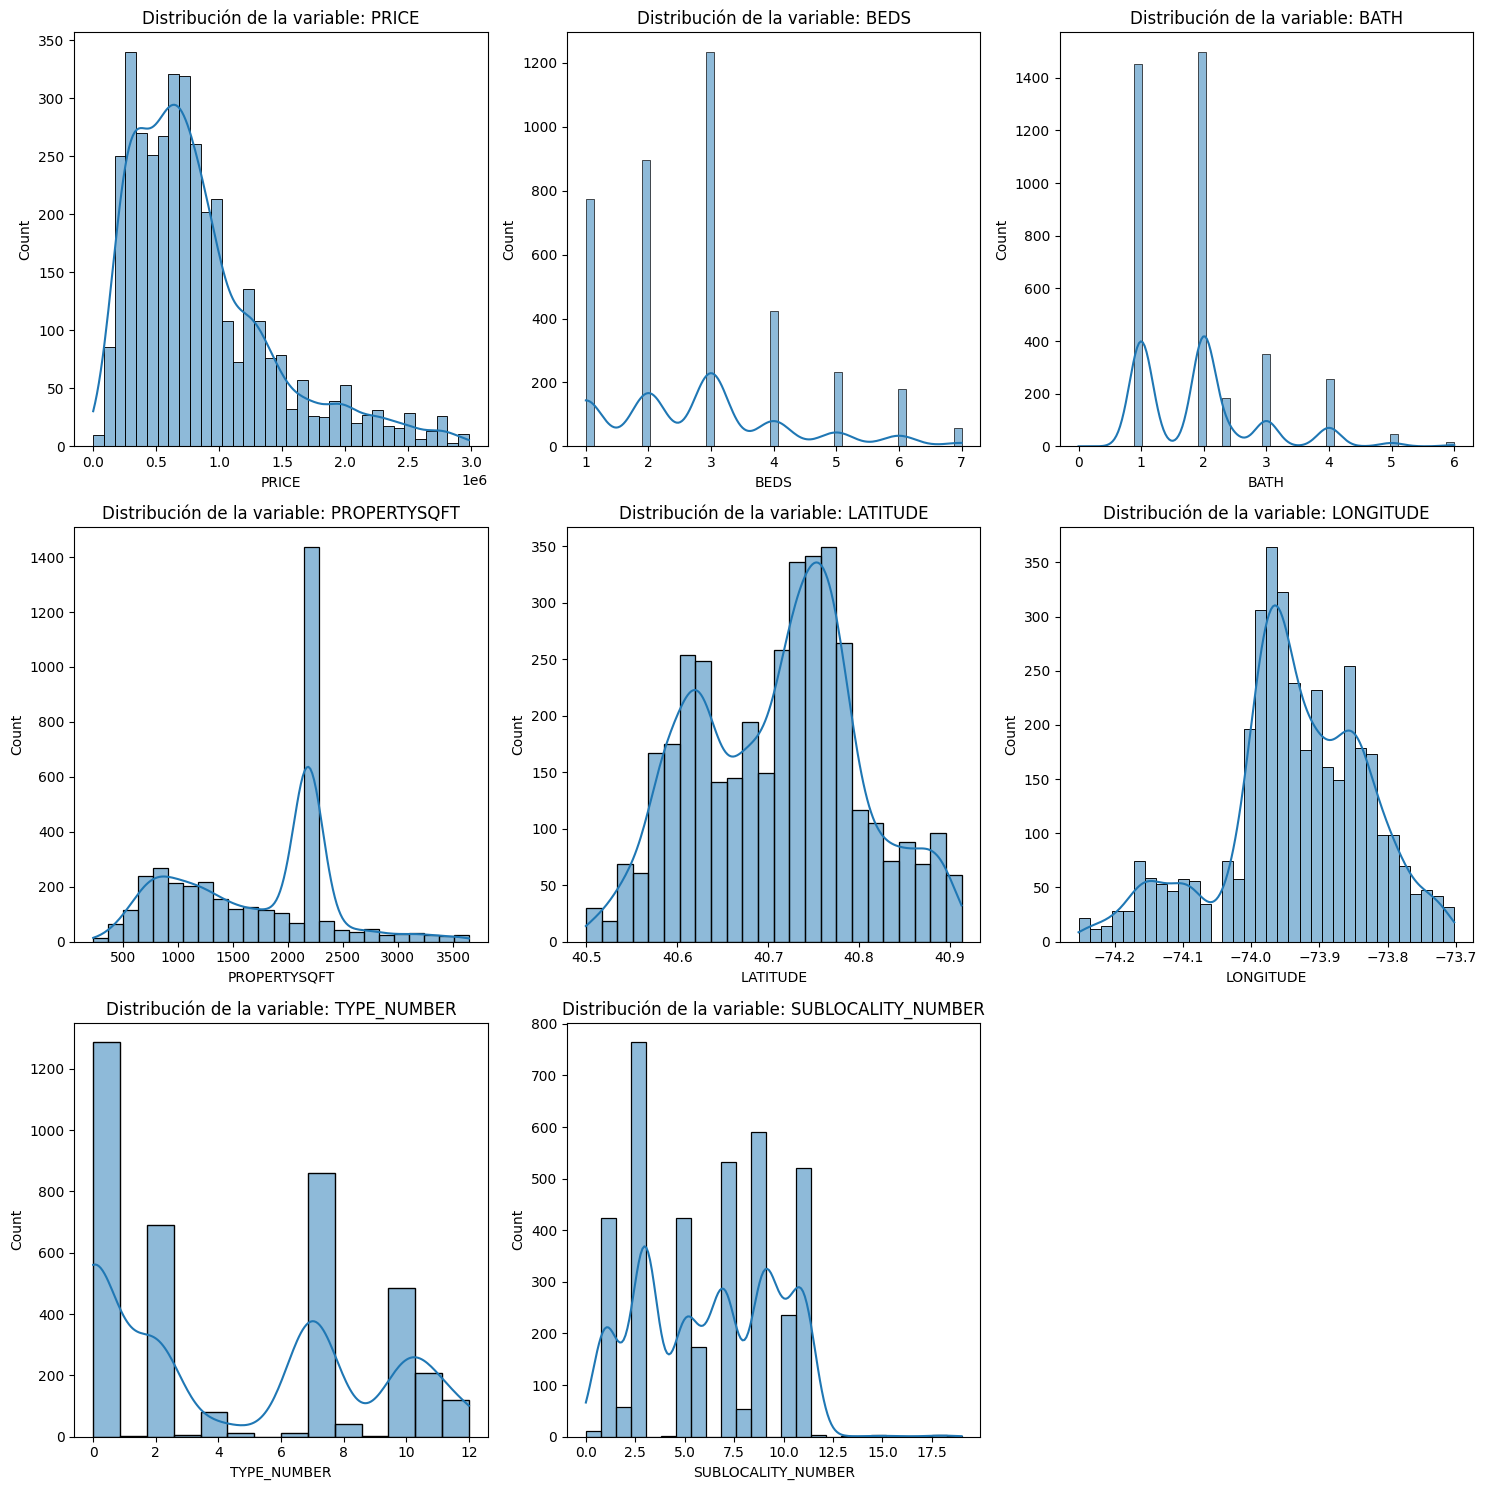

In [144]:
numerical_features = df_sin_outliers.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
cols = 3  # para mostrar 3 columnas por fila
rows = (num_plots + cols - 1) // cols  # para alcular el numero de filas

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # ajustar el tamaño

for i, feature in enumerate(numerical_features):
  row_index = i // cols
  col_index = i % cols

  sns.histplot(x=feature, data=df_sin_outliers, kde=True, ax=axes[row_index, col_index])
  axes[row_index, col_index].set_title(f"Distribución de la variable: {feature}")

# para remover subplots no utilizados
for i in range(num_plots, rows * cols):
  row_index = i // cols
  col_index = i % cols
  fig.delaxes(axes[row_index, col_index])

plt.tight_layout()  # Ajusta los parametros para mostrarlos mas ajustados
plt.show()

- A pesar de haber sacado los outliers usando IQR se puede ver qeu hay algunos outliers en especial la superficie. Seguramente es una propiedad especial que dista de la mayoria disponible en el mercado.
- El precio se ve hacia la izquierda

In [145]:
df_sin_outliers.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_NUMBER,SUBLOCALITY_NUMBER
count,3.803000e+03,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,8.453081e+05,2.794636,1.917543,1702.924377,40.710611,-73.936532,4.416250,6.252432
std,5.710581e+05,1.427966,0.962708,686.303435,0.090062,0.106267,4.182579,3.373929
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.252823,0.000000,0.000000
25%,4.250000e+05,2.000000,1.000000,1074.000000,40.632939,-73.984885,0.000000,3.000000
50%,6.999000e+05,3.000000,2.000000,1951.000000,40.722873,-73.940620,2.000000,7.000000
75%,1.090000e+06,3.000000,2.000000,2184.207862,40.770212,-73.858510,7.000000,9.000000
max,2.980000e+06,7.000000,6.000000,3645.000000,40.912729,-73.702450,12.000000,19.000000


- Precios:
  - Se puede ver que van desde USD 2494 hasta 2,9 M de USD
  - El promedio es aproximadamente 850.000 USD pero por el grafico se ve que es mas cercano a los 600.000
- Caracteristicas delas propiedades: el promedio es aproximadamente de 3 habitaciones y 2 baños

# Análisis univariado

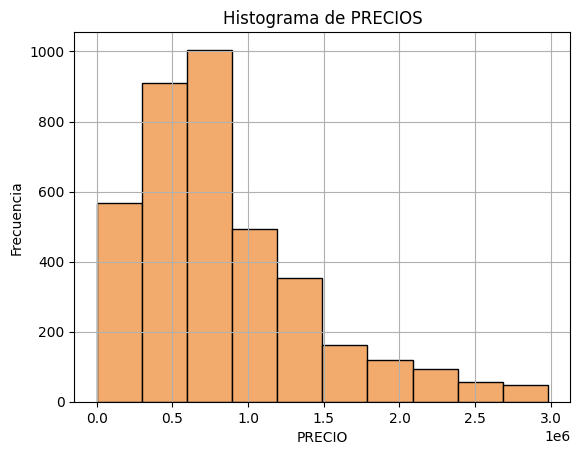

In [146]:
# Crear el histograma
df_sin_outliers['PRICE'].hist(bins=10, color='#F2AB6D', edgecolor='black')
plt.xlabel('PRECIO')
plt.ylabel('Frecuencia')
plt.title('Histograma de PRECIOS')
plt.grid(True)
plt.show()

<ipython-input-147-b17c9af62bb4>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



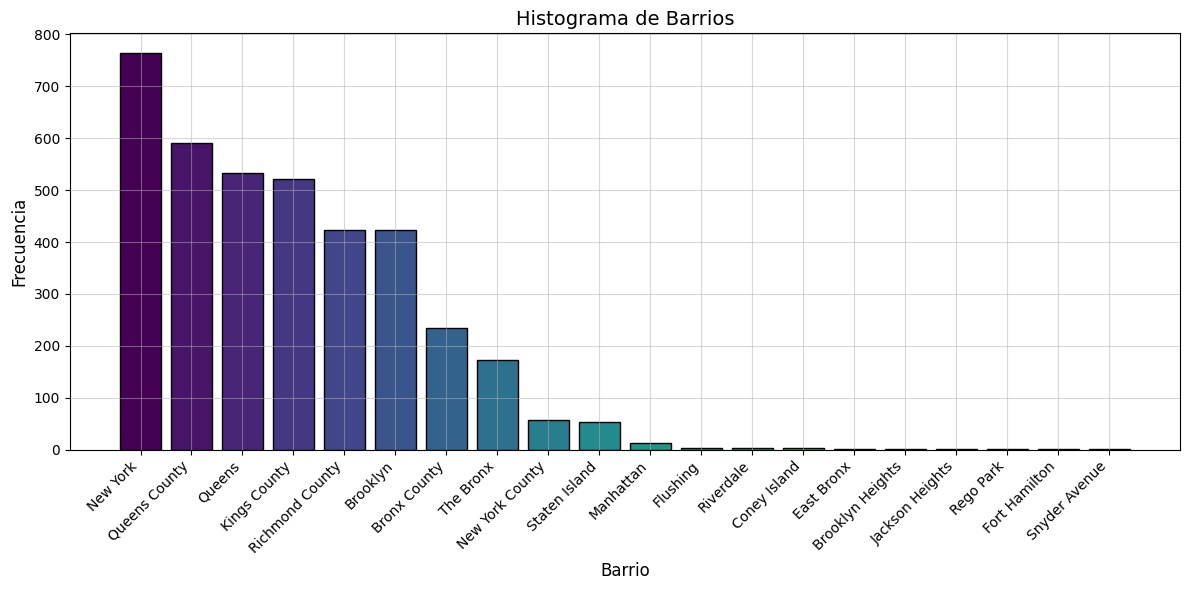

In [147]:
# Get the counts and unique values of 'SUBLOCALITY'
sublocality_counts = df_sin_outliers['SUBLOCALITY'].value_counts()
sublocalities = sublocality_counts.index

# Create a colormap with the desired number of colors
n_barras = len(sublocalities)
colores = plt.cm.get_cmap('viridis', n_barras)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(sublocalities, sublocality_counts.values, color=[colores(i) for i in range(n_barras)], edgecolor='black')

plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Barrios', fontsize=14)
plt.grid(True, alpha=0.5)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

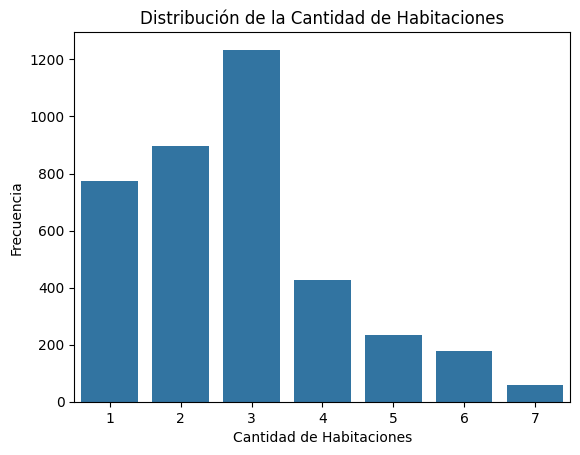

In [148]:
# Diagrama de caja (boxplot) de la variable 'BEDS'
sns.countplot(x='BEDS', data=df_sin_outliers)
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Habitaciones')
plt.show()

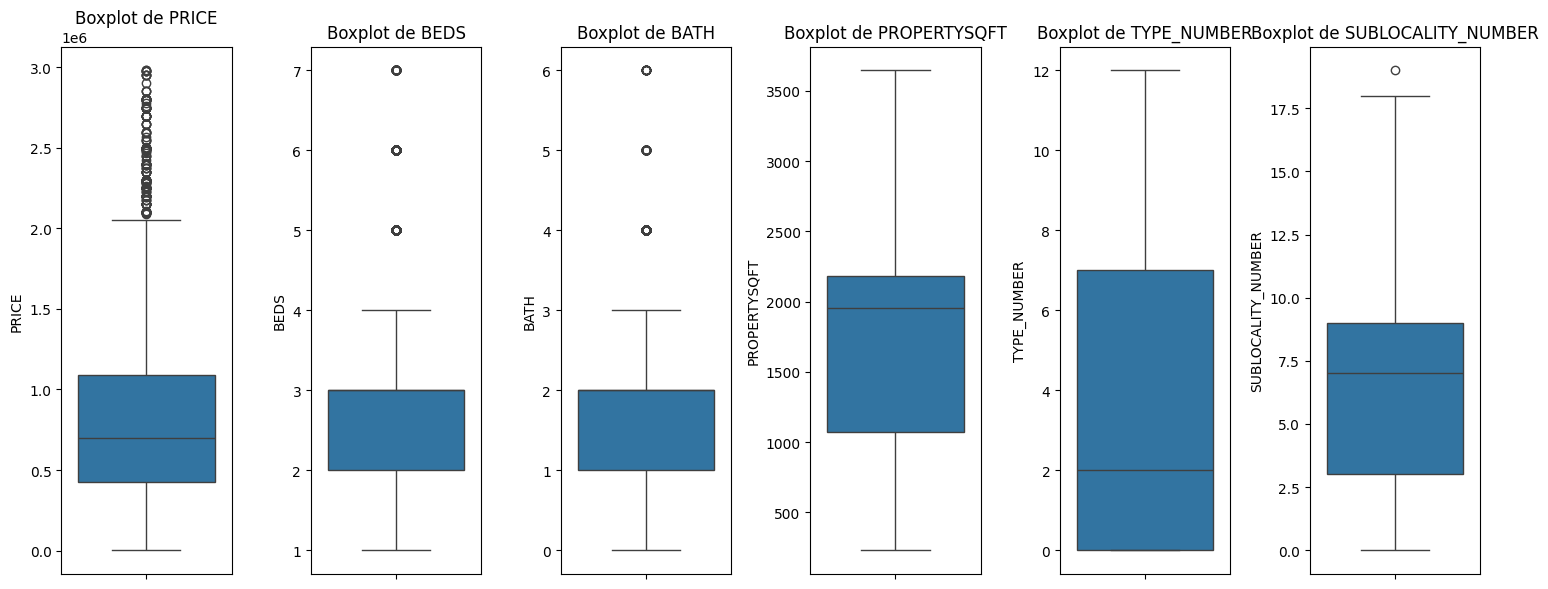

In [149]:
variables = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT','TYPE_NUMBER', 'SUBLOCALITY_NUMBER' ]

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_sin_outliers, ax=ax)
    ax.set_title(f'Boxplot de {variable}')
    ax.set_ylabel(variable)
plt.tight_layout()

# Análisis bivariado

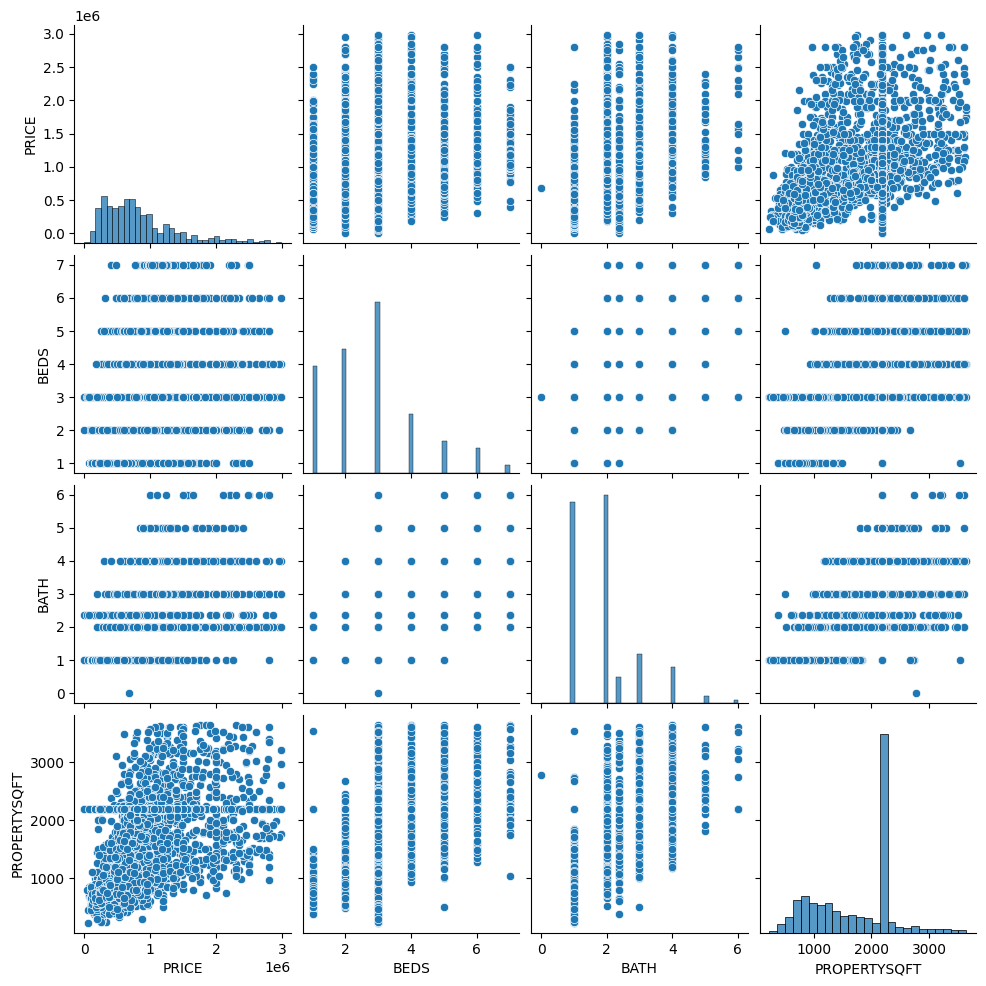

In [150]:
# Gráfico de pares (pairplot)
sns.pairplot(df_sin_outliers[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']])
plt.show()

- Se confirma la distribución de los precios hacia la izquierda
- La superficie exhibe algún outlier


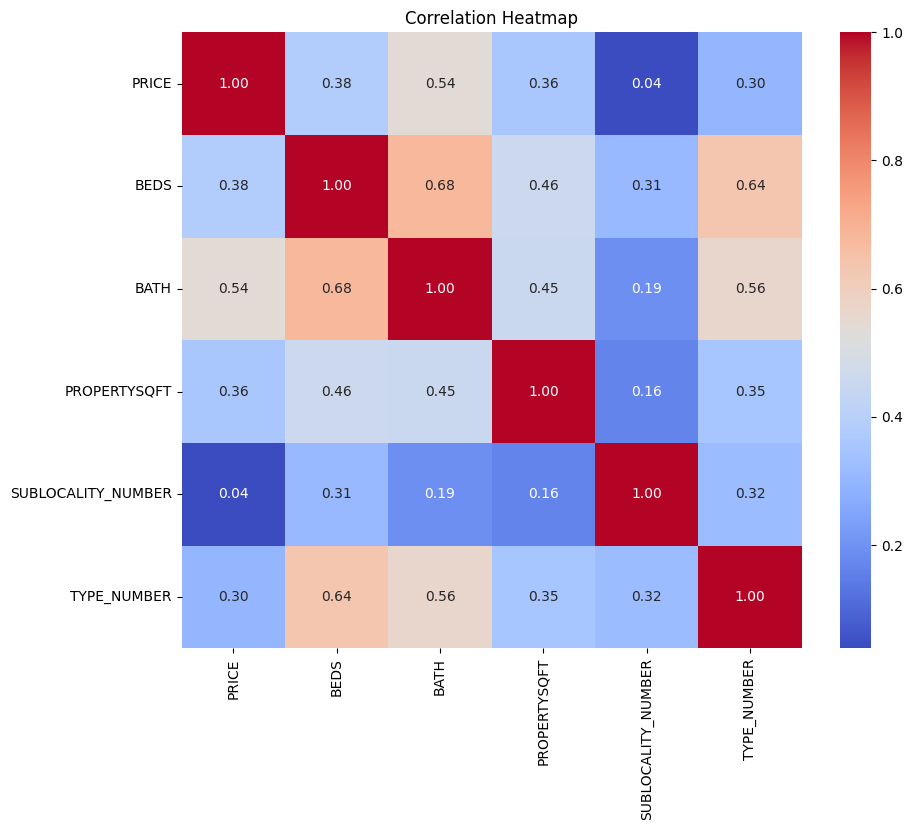

In [151]:
# Mapa de calor de correlaciones incluidos los Barrios y tipos de viviendas

corr_matrix = df_sin_outliers[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'SUBLOCALITY_NUMBER', 'TYPE_NUMBER']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


- Conclusiones:
  - No hay correlaciones importantes (cercanas a 0.8 ) de ninguna variable respecto del precio
  - La mayor correlacion con el precio lo tiene la cantidad de baños, seguido por la cantidad de habitaciones y la superficie con valores muy similares entre estas dos últimas. igualmente ningun valor llega siquiera a 0.5 por lo que a primera vista no son relevantes.
  - Puede ser que la relación entre als variables no sea lineal, o deba volver a calcularse luego de subdividir en grupos para tener mas valores realmente comparables.

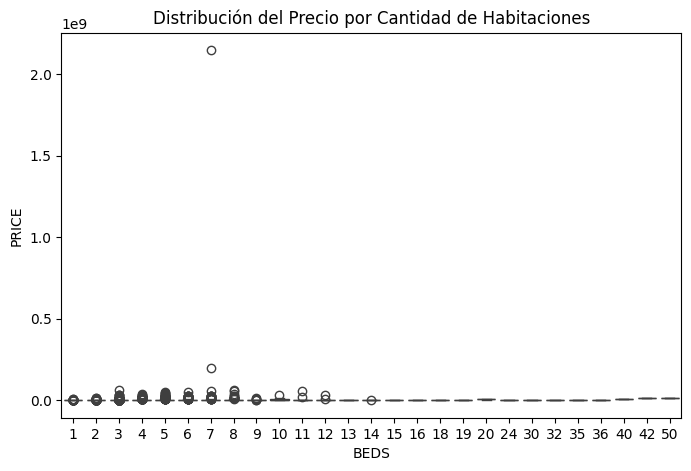

In [152]:
# Nominal vs. Intervalo: Boxplot de Precio por Cantidad de Habitaciones
plt.figure(figsize=(8, 5))
sns.boxplot(x='BEDS', y='PRICE', data=df)
plt.title('Distribución del Precio por Cantidad de Habitaciones')
plt.show()


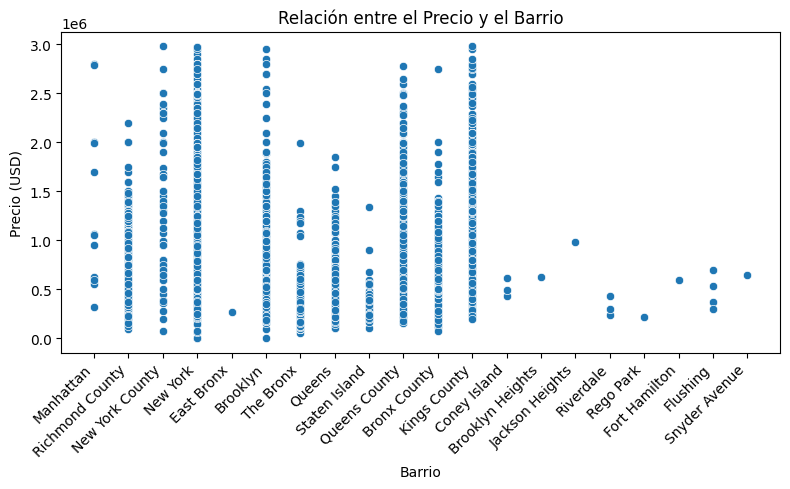

In [153]:
# Intervalo vs. Intervalo: Gráfico de dispersión entre el Precio y el Barrio
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SUBLOCALITY', y='PRICE', data=df_sin_outliers)
plt.title('Relación entre el Precio y el Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

- Conclusiones:
  - Aqui se puede ver la relación entre los precios de las propiedades y los distintos barrios
  - Se puede ver como hay barrios donde se concentran un mayor número de propiedades de alto valor (Mayor al Millón de USD)
  - En las zonas de mayor valor hay una mayor oferta de viviendas, incluso las de mas bajo precio, por lo que se asume que esas zonas son mas favorables para vivir o mejores para inversiones inmobiliarias.

In [154]:
fig = px.scatter_mapbox(df_sin_outliers, lat="LATITUDE", lon="LONGITUDE", hover_name="ADDRESS", hover_data=["SUBLOCALITY", "PRICE", "BEDS", "BATH"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

- Se puede ver un gran número de propiedades en una zona geografica relativamente pequeña (a pesar de ser un estado / provincia)
- Para que el mapa sea mas relevante debe hacerse un análisis multivariado.

# Análisis multivariado

In [155]:
# Muestro las propiedades diferenciandolas por Barrio (LOCALITY)

fig = px.scatter_mapbox(df_sin_outliers, lat="LATITUDE", lon="LONGITUDE", hover_name="ADDRESS",
                        hover_data=["SUBLOCALITY", "PRICE", "BEDS", "BATH"],
                        color="SUBLOCALITY", # para identificar cada barrio con distinto color
                        zoom=10, height=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


- De este mapa se puede ver mejor la división de los barrios y las propiedades a la venta en los mismos
- Se puede apreciar que algunas propiedades no informaron bien su barrio y solo pusieron New York (distintos puntos violetas en zonas de otro color), que es el barrio principal, pero no es el correcto.

In [156]:
# Muestro el mapa pero diferenciado por el precio (PRICE)
fig = px.scatter_mapbox(df_sin_outliers, lat="LATITUDE", lon="LONGITUDE", hover_name="ADDRESS",
                        hover_data=["SUBLOCALITY", "PRICE", "BEDS", "BATH"],
                        color="PRICE", # para identificar cada precio con distinto color
                        zoom=10, height=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


- Ya cuando se identifican los precios, se puede apreciar que las propiedades de mayor valor estan principalmente en la zona de New York, y algunos barrios cercanos como Manhatan y King´s County

In [157]:
# Scatter Plot en 3D (Precio vs. Superficie de la Propiedad vs. Número de Habitaciones)
fig = px.scatter_3d(df_sin_outliers, x='PROPERTYSQFT', y='BEDS', z='PRICE', color='SUBLOCALITY',
                    title='Precio vs. Superficie de la Propiedad vs. Número de Habitaciones')
fig.show()


- Con este tipo de gráfico se pueden ver mejor los cluster de propiedades con similares caracteristicas
- En este caso de estudio son demasiadas y no es muy claro para verlo a menos que se agrande el zoom.
- Se sugiere analizar clusterizando primeramente

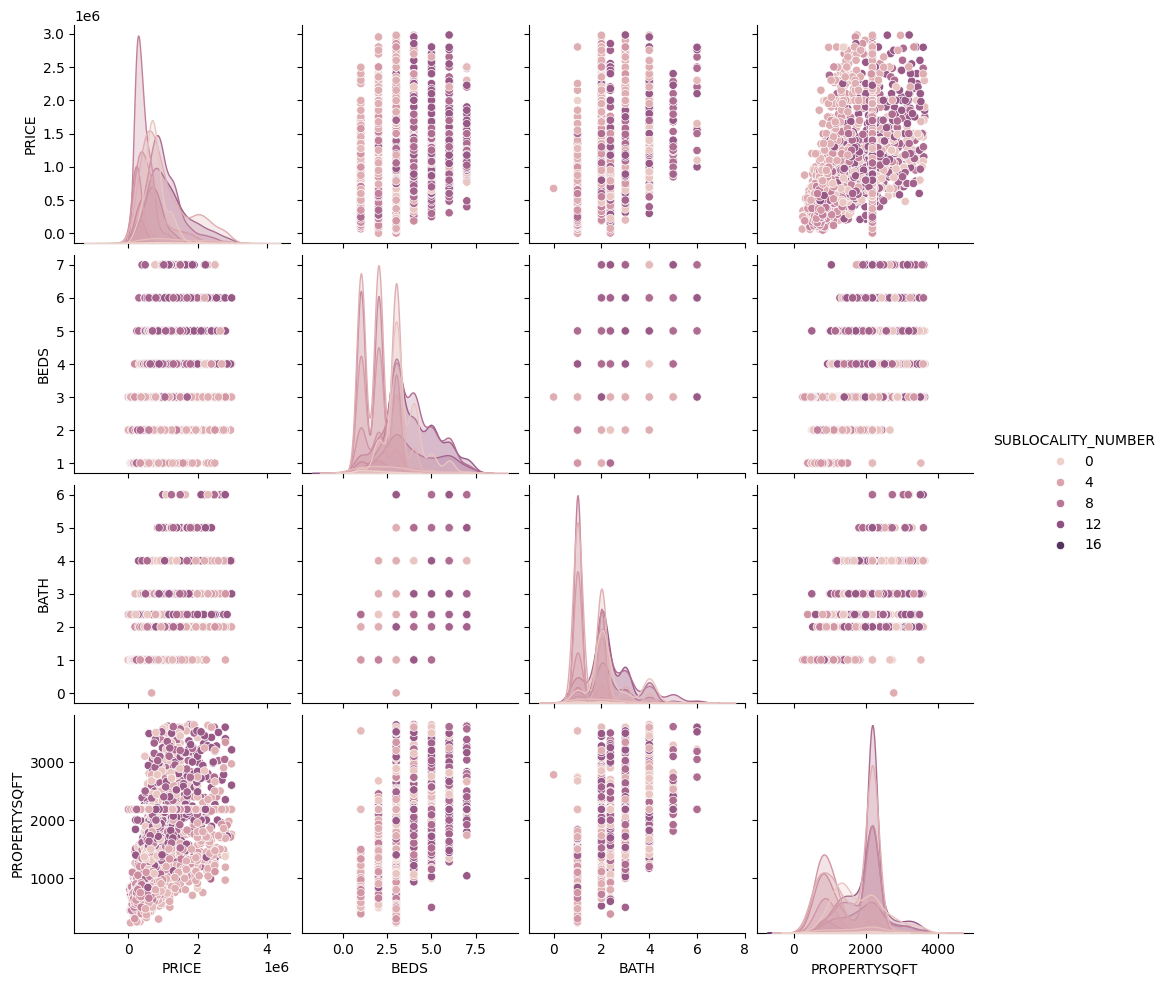

In [158]:
# Se muestra la relación entre las distintas variables identificando los distintos barrios
sns.pairplot(df_sin_outliers[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'SUBLOCALITY_NUMBER']], hue='SUBLOCALITY_NUMBER')
plt.show()


# Conclusiones del EDA

Conclusiones sobre la Distribución de Datos:
- Precio: La distribución está sesgada a la izquierda, con algunos valores atípicos muy altos.
- Superficie (PROPERTYSQFT): Se puede ver que hay valores atípicos, incluso después de la limpieza con IQR.
- Barrios (SUBLOCALITY): Se observa una concentración de propiedades en ciertos barrios, con variaciones en la cantidad de propiedades por zona. La cantidad de propiedades por cada barrio no está balanceada.
- Habitaciones (BEDS) y Baños (BATH): La distribución está concentrada alrededor de valores medios (3 habitaciones y 2 baños). hay algunos outliera aun despues de la limpieza con IQR.

Conclusiones sobre las Relaciones entre Variables:
- La correlación es débil entre precio y las otras variables numéricas (BEDS, BATH, PROPERTYSQFT) en el análisis inicial. Las correlaciones son menores a 0.5. Esto puede sugerir que la relación entre las variables puede ser no lineal, o que otras variables no incluidas en este primer análisis puedan influir significativamente.
- La ubicación (SUBLOCALITY) parece tener un impacto considerable en el precio, observándose una clara concentración de propiedades de alto valor en ciertas áreas. Esto se ve a pesar de la baja correlación con el precio.
- El análisis bivariado y el mapa de calor de correlación  proporcionan más detalles sobre la influencia del barrio en el precio. Ahi se ve que no es una variable relevante (analizandola linealmente)

Algunos comentarios de las Visualizaciones:
- Los mapas interactivos muestran la distribución geográfica de las propiedades, diferenciando por barrio y precio.  Se identificaron errores en la información de algunos barrios.
- Los gráficos de dispersión, pairplots y las visualizaciones en 3D ayudan a identificar posibles agrupaciones de propiedades con características similares, facilitando una mejor comprensión de las relaciones entre las variables.
- La gran cantidad de propiedades no hace facil la identificación de grupos o clusters. para análisis futuros se recomienda hacer una segmentacion antes.



# **Sugerencias para próximos pasos:**

- Se sugiere explorar hacer transformaciones de variables (ej: logarítmica para el precio) para mejorar la linealidad en las relaciones.
- Se pueden considerar agregar variables adicionales que podrían influir en el precio. Dichas variables pueden ser datos externos conseguidos con alguna API con información de la zona.
- Se deberia poder profundizar en el análisis de la relación entre precio y ubicación usando análisis de densidad y técnicas de segmentación.
- Se debe hacer un análisis de clusterización para agrupar propiedades con características similares y mejorar la interpretación de los mapas y las visualizaciones en 3D. tambien puede ayudar a tener propiedaes mas comparables para poder hacer una predicción de precios.
- Hay que evaluar modelos de regresión más complejos para capturar posibles relaciones no lineales.
- Se pueden revisar las propiedades con datos erróneos (ejemplo: ubicación mal informada, outliers especificos como el de Superficie), y corregir o eliminar dichos elementos.

# Preprocesamiento de datos
### Normalización de variables numéricas

In [160]:
# Normalizo las variables núméricas en base al Skewness

numericas = df_sin_outliers.select_dtypes(exclude=['object']).columns #['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
for feature in numericas:
    skewness = df_sin_outliers[feature].skew()
    if skewness > 1:
        # Si el skewness es alto, usamos MinMaxScaler
        scaler = MinMaxScaler()
    else:
        # Si el skewness es bajo, usamos StandardScaler
        scaler = StandardScaler()

    df_sin_outliers[feature] = scaler.fit_transform(df_sin_outliers[[feature]])

In [162]:
# Verifico como quedó la normalización de las variables númericas
df_sin_outliers.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,TYPE_NUMBER,SUBLOCALITY_NUMBER
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,0.104956,-0.556554,0.333333,-0.441444,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",0.562399,-0.357183,-0.577770,-1.853405
2,Brokered by Sowae Corp,House for sale,0.086484,0.844224,0.333333,0.454779,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",-1.874567,-2.443006,0.617822,-1.556975
3,Brokered by COMPASS,Condo for sale,0.022336,0.143835,0.166667,-1.833139,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",0.563986,-0.358401,-0.577770,-1.260546
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,0.301261,-0.556554,0.333333,0.701361,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",1.097576,-0.096424,-0.577770,-0.964116
8,Brokered by Pantiga Group Inc.,Co-op for sale,0.088163,-1.256943,0.166667,-1.388671,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",1.232364,0.587676,-1.056007,-0.667687


# **Feature Selection**
Seleccionamos la variable objetivo y las variable independientes

Seleccion de variables usando Backward Selection:

Variables seleccionadas y su correlación con PRICE, ordenadas de mayor a menor:
BATH: 0.5404
BEDS: 0.3834
PROPERTYSQFT: 0.3589
TYPE_NUMBER: 0.2982
LONGITUDE: 0.1178
LATITUDE: 0.0411
SUBLOCALITY_NUMBER: 0.0391


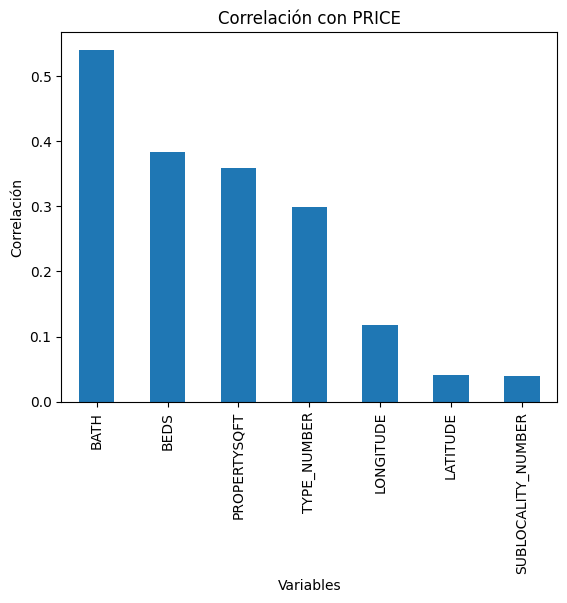

In [163]:
# Se mantienen solo las columnas numéricas
numerical_df = df_sin_outliers.select_dtypes(include='number')

# Se separan las variables predictoras y la variable objetivo
y = numerical_df['PRICE']  # Variable objetivo
X = numerical_df.drop(columns=['PRICE'])  # Variables predictoras

# Función para backward selection
def backward_selection(X, y, significance_level=0.6):
    initial_vars = X.columns.tolist()
    while len(initial_vars) > 0:
        # Use sm.OLS here
        model = sm.OLS(y, X[initial_vars]).fit()
        # Obtener la p-valor máximo entre las variables actuales
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            excluded_var = model.pvalues.idxmax()
            initial_vars.remove(excluded_var)
        else:
            break
    return initial_vars

# Ejecutar la selección hacia atrás
selected_vars = backward_selection(X, y)

# Remover 'const' si está en las variables seleccionadas
if 'const' in selected_vars:
    selected_vars.remove('const')

# Calcular la correlación con 'PRICE' para las variables seleccionadas y ordenarlas
correlation_with_PRICE = numerical_df[selected_vars].corrwith(numerical_df['PRICE']).abs()
correlation_sorted = correlation_with_PRICE.sort_values(ascending=False)

# Mostrar la lista ordenada de variables seleccionadas
print("Variables seleccionadas y su correlación con PRICE, ordenadas de mayor a menor:")
for var, corr in correlation_sorted.items():
    print(f"{var}: {corr:.4f}")

# Graficar la correlación de las variables seleccionadas con 'PRICE'
correlation_sorted.plot(kind='bar', title='Correlación con PRICE')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

In [164]:
# Verifico el tamaño del nuevo df
numerical_df.shape

(3803, 8)

In [165]:
# Se filtran las columnas de interés (PRICE y las seleccionadas) creando un nuevo df reducido y una semilla para utilizar en todos los modelos
df = numerical_df[['PRICE', 'BATH', 'BEDS', 'PROPERTYSQFT', 'TYPE_NUMBER', 'LONGITUDE']]

# Definir las variables
X = df.drop('PRICE', axis=1) # variables predictoras elegidas en base a la función backward Selection y la correlacion de las variables con Target_Encoded
y = df['PRICE'] #Variable objetivo

# Se define la semilla
semilla = 42 # la respuesa a la pregunta "¿cuál es el significado de la vida, el universo y todo lo demás?"

# Modelos de datos

Se intentará probar mediante el uso de diferentes modelos predictivos supervisados  y comparando sus resultados(regresion lineal, Random Forest, SVM) la hipotesis planteada anteriormente.
La idea principal es ver si se puede predecir el precio en base a los datos que tenemos y a las variables seleccionadas como mas relevantes.

Se seleccionan las variables y se preparan los datos para su entrenamiento de los modelos.


In [166]:
# Se hace un split de 80/20
# Se elige este valor de relacion entre la muestra de entrenamiento del modelo y el testeo luego de haber probado varias tamaños manualmente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)


In [167]:
# Se verifica el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (3042, 5)
Tamaño de X_test: (761, 5)
Tamaño de y_train: (3042,)
Tamaño de y_test: (761,)


In [168]:
# Se crea un DF para ir guardando los resultados
column_names = ["Modelo", "R^2", "MAE", "MSE", "RMSE", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [169]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'R^2': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    # Eliminar columnas vacías o todas NA
    resultados_df = resultados_df.dropna(axis=1, how='all')

    return resultados_df

In [170]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Visualizar la relación entre las predicciones y los valores reales
    plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de Perfecta Predicción')
    plt.title(f'Valores reales Vs Predicciones - {nombre_modelo}')
    plt.xlabel('Valores Reales de PRICE')
    plt.ylabel('Predicciones de PRICE')
    plt.legend()
    plt.show()



### Modelo: Regresión lineal

In [171]:
modelo = LinearRegression()

Resultados para el modelo: Regresión Lineal
             Modelo       R^2       MAE       MSE      RMSE    Tiempo
0  Regresión Lineal  0.312307  0.114715  0.025673  0.160227  0.005064 



<ipython-input-170-2b0820ec4535>:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



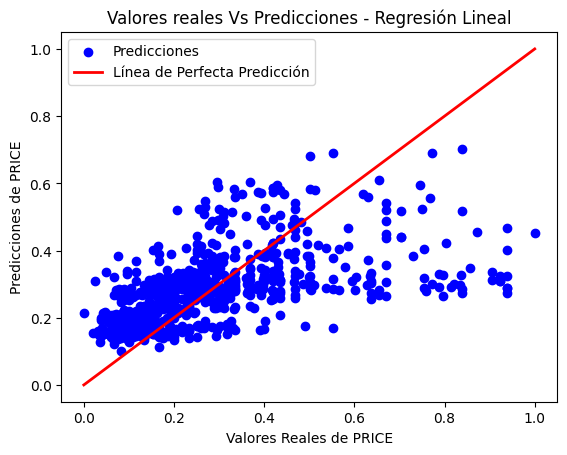

In [172]:
entrenar_modelo(modelo, 'Regresión Lineal', X_train, y_train, X_test, y_test)

### Modelo: Árbol de Desición

In [173]:
modelo = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=semilla
)

Resultados para el modelo: Árbol de Decisión
              Modelo       R^2       MAE       MSE      RMSE    Tiempo
0  Árbol de Decisión  0.547602  0.091405  0.016889  0.129956  0.029286 



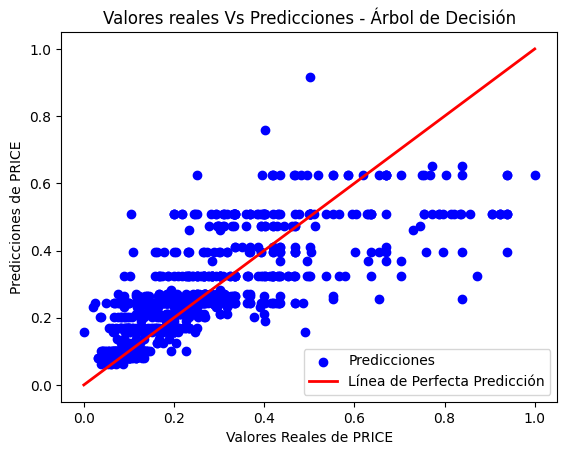

In [174]:
entrenar_modelo(modelo, 'Árbol de Decisión', X_train, y_train, X_test, y_test)

### Modelo: Random Forest

In [175]:
modelo = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=semilla
)

Resultados para el modelo: Random Forest
          Modelo       R^2       MAE       MSE      RMSE    Tiempo
0  Random Forest  0.631346  0.079809  0.013762  0.117313  0.750882 



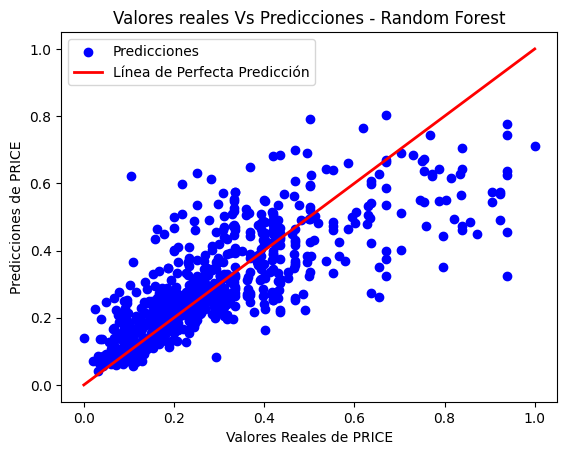

In [176]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

### Modelo: Gradient Boosting

In [177]:
modelo = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=semilla
)

Resultados para el modelo: Gradient Boosting
              Modelo       R^2       MAE       MSE      RMSE   Tiempo
0  Gradient Boosting  0.639578  0.081993  0.013455  0.115996  0.40402 



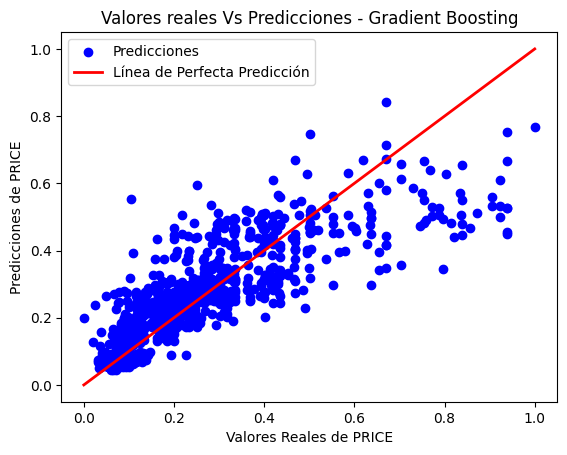

In [178]:
entrenar_modelo(modelo, 'Gradient Boosting', X_train, y_train, X_test, y_test)

In [179]:
# Muestro los esultados del análisis de los modelos inicial

resultados_df

,Modelo,R^2,MAE,MSE,RMSE,Tiempo
0,Regresión Lineal,0.312307,0.114715,0.025673,0.160227,0.005064
1,Árbol de Decisión,0.547602,0.091405,0.016889,0.129956,0.029286
2,Random Forest,0.631346,0.079809,0.013762,0.117313,0.750882
3,Gradient Boosting,0.639578,0.081993,0.013455,0.115996,0.404020


### Resumen preliminar de los resultados de optimización del modelo
  - Se puede ver que el modelo de mennor desempeño es la Regresión Lineal con un R^2 de 0.3123
  - El modelo con mejor desempeño fue Gradient Boosting con un R^2 de 0.6395
  - El desempeño de Random Forest fue similar
  - Todavia los valores de R^2 no son lo suficientemente relevantes ( 0.8 o mayor) como para decir que el modelo pedice de forma razonable
  - Optaremos por revisar si se puede mejorar el modelo ajustando los hiperparametros

# **Optimización del modelo mediante ajustes de hiperparámetros**


Mejores parámetros para Regresión Lineal: {}
Resultados del modelo ajustado: Regresión Lineal
                        Modelo       R^2       MAE       MSE      RMSE  \
0  Regresión Lineal (Ajustado)  0.312307  0.114715  0.025673  0.160227   

     Tiempo  
0  2.999542   



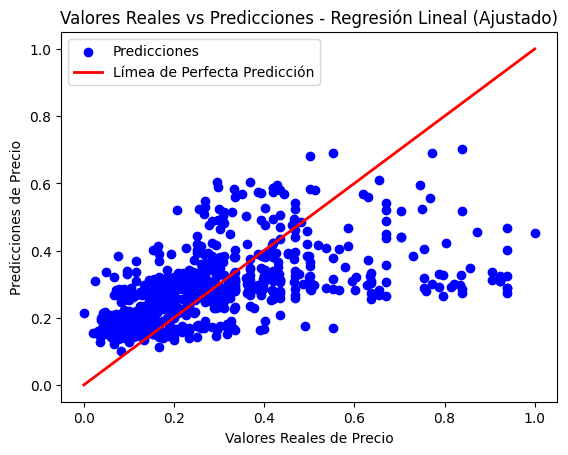

Mejores parámetros para Árbol de Decisión: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Resultados del modelo ajustado: Árbol de Decisión
                         Modelo       R^2       MAE      MSE      RMSE  \
0  Árbol de Decisión (Ajustado)  0.559074  0.085966  0.01646  0.128298   

     Tiempo  
0  2.847432   



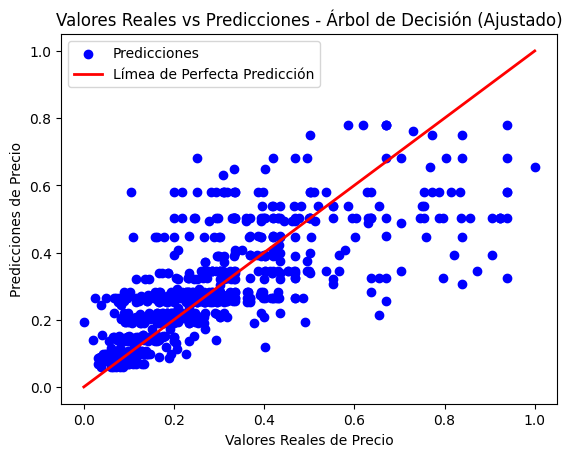

Mejores parámetros para Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Resultados del modelo ajustado: Random Forest
                     Modelo       R^2       MAE       MSE      RMSE  \
0  Random Forest (Ajustado)  0.628668  0.080377  0.013862  0.117738   

       Tiempo  
0  153.825876   



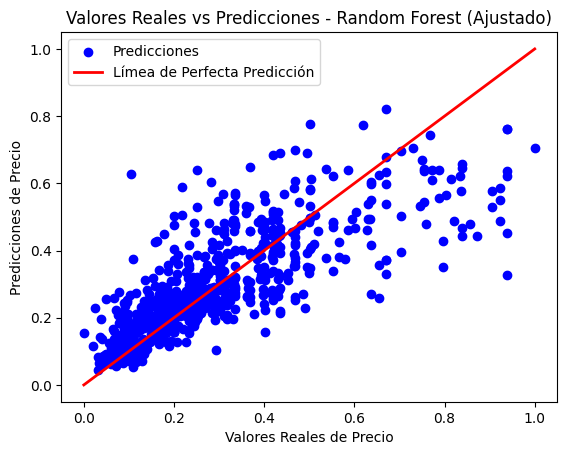

Mejores parámetros para Gradient Boosting: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Resultados del modelo ajustado: Gradient Boosting
                         Modelo       R^2       MAE       MSE     RMSE  \
0  Gradient Boosting (Ajustado)  0.629101  0.081591  0.013846  0.11767   

       Tiempo  
0  104.470561   



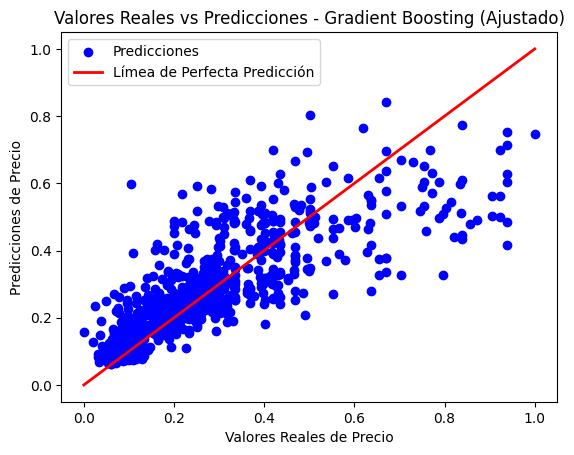

                         Modelo       R^2       MAE       MSE      RMSE  \
0              Regresión Lineal  0.312307  0.114715  0.025673  0.160227   
1             Árbol de Decisión  0.547602  0.091405  0.016889  0.129956   
2                 Random Forest  0.631346  0.079809  0.013762  0.117313   
3             Gradient Boosting  0.639578  0.081993  0.013455  0.115996   
4   Regresión Lineal (Ajustado)  0.312307  0.114715  0.025673  0.160227   
5  Árbol de Decisión (Ajustado)  0.559074  0.085966  0.016460  0.128298   
6      Random Forest (Ajustado)  0.628668  0.080377  0.013862  0.117738   
7  Gradient Boosting (Ajustado)  0.629101  0.081591  0.013846  0.117670   

       Tiempo  
0    0.005064  
1    0.029286  
2    0.750882  
3    0.404020  
4    2.999542  
5    2.847432  
6  153.825876  
7  104.470561  

Mejor Modelo Analizado: Gradient Boosting con R^2 = 0.6395781886663727


In [180]:
# Se definirá una función para poder ajustar y evaluar los distintos ajustes de los Hiperparámetros. Se utilizará la función avanzada Grid Search
# Definimos la metrica de scoring
scorer = make_scorer(r2_score)

# Se define la función para realizar el ajuste y prueba del desempeño de los hiperparámetros
def ajustar_y_evaluar(model, model_name, X_train, y_train, X_test, y_test, param_grid, search_type='grid'):
    start_time = time.time()

    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1)
    else:  # RandomizedSearchCV
        search = RandomizedSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1, n_iter=50) # Pocas iteraciones son mas rapidas, pero no traen grandes cambios en los resultados

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    end_time = time.time()

    # Evaluar y guardar los resultados
    resultados = guardo_resultados(model_name + " (Ajustado)", y_test, y_pred, end_time - start_time)

    print(f"Mejores parámetros para {model_name}: {search.best_params_}")
    print("Resultados del modelo ajustado:", model_name)
    print(resultados, "\n")

    plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Límea de Perfecta Predicción')
    plt.title(f'Valores Reales vs Predicciones - {model_name} (Ajustado)')
    plt.xlabel('Valores Reales de Precio')
    plt.ylabel('Predicciones de Precio')
    plt.legend()
    plt.show()

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


# Evaluacion y ajuste de los hiperparámetros mejorados o ajustados

# Regresión Lineal (no tiene muchos hiperparámetros que traigan cambios significativos)
ajustar_y_evaluar(LinearRegression(), "Regresión Lineal", X_train, y_train, X_test, y_test, {}, search_type='grid')


# Árbol de Decisión
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1,2,4]
}

ajustar_y_evaluar(DecisionTreeRegressor(random_state=semilla), "Árbol de Decisión", X_train, y_train, X_test, y_test, param_grid_dt)

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

ajustar_y_evaluar(RandomForestRegressor(random_state=semilla), "Random Forest", X_train, y_train, X_test, y_test, param_grid_rf, search_type='randomized')


# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

ajustar_y_evaluar(GradientBoostingRegressor(random_state=semilla), "Gradient Boosting", X_train, y_train, X_test, y_test, param_grid_gb, search_type='randomized')

# Para mostrar los resultados
print(resultados_df)
# Encontrar los Mejores Resultados basados en el R^2
best_model_index = resultados_df['R^2'].idxmax()
best_model = resultados_df.loc[best_model_index]
print(f"\nMejor Modelo Analizado: {best_model['Modelo']} con R^2 = {best_model['R^2']}")


# **Conclusiones**

### Conclusiones acerca de la optimización de modelos y el análisis final

Las conclusiones sobre la optimización de los modelos predictivos son:

1.  **Importancia de la selección de variables:** La aplicación de Backward Selection y el análisis de correlación permitieron identificar las variables más relevantes para predecir el precio de las propiedades ('BATH', 'BEDS', 'PROPERTYSQFT', 'TYPE_NUMBER', 'LONGITUDE').  Esto mejoró la eficiencia de los modelos al reducir el ruido y centrarse en las variables más influyentes.

2.  **Comparación de modelos:** Se evaluaron cuatro modelos de regresión: Regresión Lineal, Árbol de Decisión, Random Forest y Gradient Boosting.  Se observó que la Regresión Lineal tuvo el menor rendimiento (R^2 bajo), mientras que Gradient Boosting y Random Forest tuvieron un rendimiento considerablemente mejor, alcanzando R^2 superiores.

3. **Optimización de hiperparámetros:** La optimización de hiperparámetros mediante GridSearchCV y RandomizedSearchCV mejoró el rendimiento de los modelos, especialmente para los modelos más complejos como Árbol de Decisión, Random Forest y Gradient Boosting.

4. **Rendimiento del mejor modelo:** El modelo que trabajó mejor fue el Gradient Boosting con un R^2 de 0.6395. Aunque la optimización de hiperparámetros trató de mejorar el rendimiento de los modelos, se observa que los valores de R^2, aunque mejorados, aún no son lo suficientemente altos (no llegan a 0.8) como para asegurar una predicción de precios altamente precisa. Se considera que es necesario continuar buscando mejoras en la preparación de datos o en la selección de modelos.

5. **Limitaciones y futuras mejoras:**  El análisis muestra que a pesar de los métodos utilizados, la predicción de precios con la precisión deseada no se ha alcanzado.

**Sugerencias de mejora**,
Dentro de las acciones que se podrían tomar para mejorar la predicción se incluyen:

-   **Limpieza de datos:** Revisar y corregir datos erróneos o outliers, ya que pueden afectar el desempeño del modelo. Algunos datos como la Sublocalidad no tenian buena información. Siguiendo con ese ejemplo, muchas propiedades solo decian pertenecer a New York, lo que pareció ser lo que se completó por default enlas propiedades que no tenian dichos datos correctos.
-   **Transformaciones de variables:** Explorar transformaciones como logarítmicas para mejorar la linealidad.
-   **Variables adicionales:** Se recomiendo poder datos externos de la zona, obtenidos con APIs, que podrían aportar información relevante. Se considera que la relevancia de las variables contenidas en el dataset no es la adecuada. Quizas otro dataset con mas información ayude a los modelos.
-   **Análisis de densidad y segmentación:** Se puede cambiar el enfoque a un análisis del tipo de segmentación o clusterización para ver si se encuentran nuevas relaciones o clusters para profundizar en la relación entre precio y ubicación.
-   **Clusterización:** Segmentar las propiedades para mejorar la comparación y, potencialmente, la precisión de las predicciones.
-   **Modelos más complejos:** Evaluar otros modelos de regresión o modelos más avanzados de aprendizaje automático.




# **Resumen**

El análisis realizado no es capaz de lograr una predicción de los precios de las propiedades de acuerdo a la presición deseada u óptima.

La optimización de los hiperparámetros ayudó a incrementar en la precisión, pero el rendimiento final de los modelos sigue dejando margen para la mejora.

Para alcanzar mayor exactitud en la predicción de precios, es recomendable continuar con un proceso iterativo de mejora en los datos y en la elección de modelos, así como también en la aplicación de las técnicas mencionadas.